# Introduction to Bayesian Analysis via Grid Methods

With python!

In [4]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

import sklearn.linear_model as lm
import statsmodels.api as sm

## 1. Biased Coins
Let's say we have some obervations of coin flips and we want to determine if the coin is biased.

In [25]:
toss_observations = stats.distributions.bernoulli.rvs(0.55, size=100) # In this case, the coin IS biased, but only slightly.
toss_observations

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1])

We can easily get a point estimate for the Bernoulli weighting paramter by dividing the positive observations by the total observations.

In [26]:
positive_obs = sum(toss_observations)
total_obs = len(toss_observations)
positive_obs / total_obs

0.63

However, let's use Bayesian inference to obtain this point estimate.

First, we'll set up a "grid" of hypotheses to test.

In [27]:
number_of_hypotheses = 100
hypotheses_w = np.linspace(0, 1, number_of_hypotheses)
hypotheses_w

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [28]:
prior = np.ones([len(hypotheses_w)]) # Here we are choosing a "flat" prior, i.e we are assuming nothing about what the parameters is. In reality, with a coin, we'd likely start with a prior of about 0.5. 
prior

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [29]:
unnormalized_posterior = np.zeros([len(hypotheses_w)])
unnormalized_posterior

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Now, this is where we do our number crunching and Bayes Theorem to find our posterior distribution and our point estimate.

In [30]:
marginal_likelihood = 0
for i in range(len(hypotheses_w)):
    weight = hypotheses_w[i]
    unnormalized_likelihood = 1
    for x in toss_observations:
        unnormalized_likelihood *= stats.distributions.bernoulli.pmf(x, weight)  # what is the likelihood of seeing this data point, given this distribution with these parameters?
    unnormalized_posterior[i] = unnormalized_likelihood*prior[i]        
    marginal_likelihood += unnormalized_likelihood*prior[i] 
        
posterior_1 = unnormalized_posterior/marginal_likelihood

To obtain a point estimate for our praramter we will use the maximum a posteriori probability (MAP). From Wikipedia: "In Bayesian statistics, a maximum a posteriori probability (MAP) estimate is an estimate of an unknown quantity, that equals the mode of the posterior distribution. The MAP can be used to obtain a point estimate of an unobserved quantity on the basis of empirical data."

In [31]:
map_w = hypotheses_w[np.where(posterior_1 == np.amax(posterior_1))][0]
map_w

0.6262626262626263

Unsuprisingly, we get the same piont estimate that we did when we simply took the positive observatoins and divided by the total number of observations. However, one of the big advantages of Bayesian inference is that we not only get a point estimate but also a distribution.

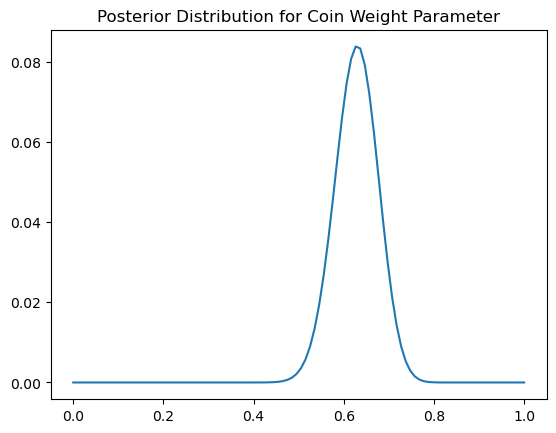

In [32]:
plt.plot(hypotheses_w, posterior_1);
plt.title(f"Posterior Distribution for Coin Weight Parameter");

Now... let's do something more interesting.

## 2. Measurement Errors

Let's look at a more complex example. Here we are going to simulate a guassian process with two known parameters that we will then try to recover.

In [39]:
true_mean = 15.3
true_sd = 2.6

# Seed random number generator
np.random.seed(161)

measured_observations = np.random.normal(true_mean, true_sd, 10)
measured_observations

array([14.85263774, 16.62494374, 13.22619061, 14.70800314, 16.77152221,
       11.8431402 , 12.92269157, 17.06490024, 11.55070899, 15.75506944])

First let's take a standard approach and take the mean and standard deviation of our observed samples. We could stop here and generate a normal distribution that quantified our beleif in what the true paramters are.

In [40]:
np.mean(measured_observations), np.std(measured_observations)

(14.531980787584285, 1.945616000459237)

But let's get our Bayes on and incorporate a prior. We'll keep it flat for now, but this will still give us a better idea about how our hypotheses are likely to be distributed.

Setting up our "grid" for two parameters we are trying to infer

In [41]:
hypotheses_mean = np.linspace(10, 20, 100) #These are all the means we want to test
hypotheses_sd = np.linspace(0.001, 4, 100) #These are all the standard deviations we want to test

In [42]:
hypotheses_mean

array([10.        , 10.1010101 , 10.2020202 , 10.3030303 , 10.4040404 ,
       10.50505051, 10.60606061, 10.70707071, 10.80808081, 10.90909091,
       11.01010101, 11.11111111, 11.21212121, 11.31313131, 11.41414141,
       11.51515152, 11.61616162, 11.71717172, 11.81818182, 11.91919192,
       12.02020202, 12.12121212, 12.22222222, 12.32323232, 12.42424242,
       12.52525253, 12.62626263, 12.72727273, 12.82828283, 12.92929293,
       13.03030303, 13.13131313, 13.23232323, 13.33333333, 13.43434343,
       13.53535354, 13.63636364, 13.73737374, 13.83838384, 13.93939394,
       14.04040404, 14.14141414, 14.24242424, 14.34343434, 14.44444444,
       14.54545455, 14.64646465, 14.74747475, 14.84848485, 14.94949495,
       15.05050505, 15.15151515, 15.25252525, 15.35353535, 15.45454545,
       15.55555556, 15.65656566, 15.75757576, 15.85858586, 15.95959596,
       16.06060606, 16.16161616, 16.26262626, 16.36363636, 16.46464646,
       16.56565657, 16.66666667, 16.76767677, 16.86868687, 16.96

In [43]:
prior = np.ones([len(hypotheses_mean), len(hypotheses_sd)]) # Here we are choosing a flat prior
prior

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [44]:
unnormalized_posterior = np.zeros([len(hypotheses_mean), len(hypotheses_sd)])
unnormalized_posterior

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [45]:
marginal_likelihood = 0
for i in range(len(hypotheses_mean)):
    mean = hypotheses_mean[i]
    for j in range(len(hypotheses_sd)):
        sd = hypotheses_sd[j]
        unnormalized_likelihood = 1
        for x in measured_observations:
            unnormalized_likelihood *= stats.distributions.norm.pdf(x, mean, sd)  # what is the likelihood of seeing this data point, given this distribution with these parameters?
        unnormalized_posterior[i,j] = unnormalized_likelihood*prior[i,j]        
        marginal_likelihood += unnormalized_likelihood*prior[i,j] 
        
posterior_2 = unnormalized_posterior/marginal_likelihood

Let's check that our posterior integrates to 1.

In [178]:
sum(sum(posterior_2))

1.0000000000000016

Let's find where the maximum probabilities are located in our grid, so that we can find the maximum a posteriori probability (MAP).

In [59]:
max_posterior_2 = np.where(posterior_2 == np.amax(posterior_2))

map_mean = hypotheses_mean[max_posterior_2[0]][0]
map_sd = hypotheses_sd[max_posterior_2[1]][0]

Let's check the point estimates of our grid method and compare with the standard calculations.

In [60]:
print(f'Mean of obervations:{np.mean(measured_observations)}, Mean with Bayes:{map_mean}' )
print(f'Std Dev of obervations:{np.std(measured_observations)}, Std Dev estimated with Bayes:{map_sd}')

Mean of obervations:14.531980787584285, Mean with Bayes:14.545454545454545
Std Dev of obervations:1.945616000459237, Std Dev estimated with Bayes:1.9399090909090906


Nice. Pretty similar... So why did we go through all that trouble to just get the same point estimates? Well, remember: that's not all we get! We also get a posterior distribution for each of our parameters of interest.

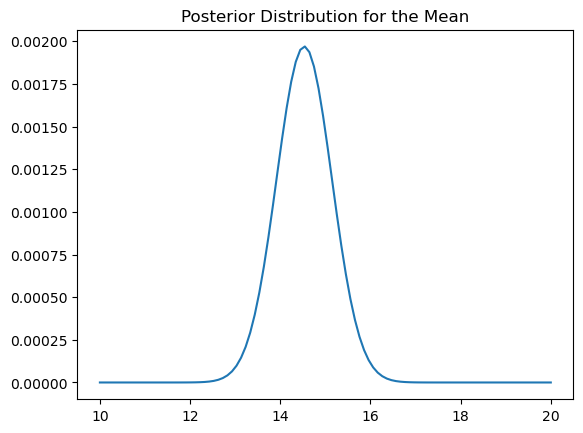

In [61]:
plt.plot(hypotheses_mean, posterior_2[:, max_posterior_2[1]]);
plt.title("Posterior Distribution for the Mean");

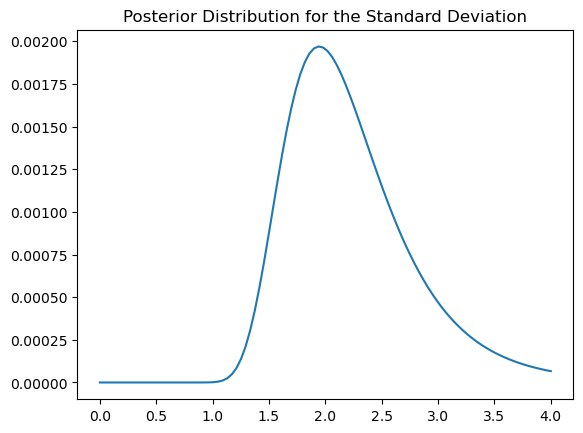

In [62]:
plt.plot(hypotheses_sd, posterior_2[max_posterior_2[0], :].T);
plt.title("Posterior Distribution for the Standard Deviation");

Sweet. Now let's look at what our 2D prior and posterior distribution looks like with a contour plot.

Text(0, 0.5, 'Probabilty')

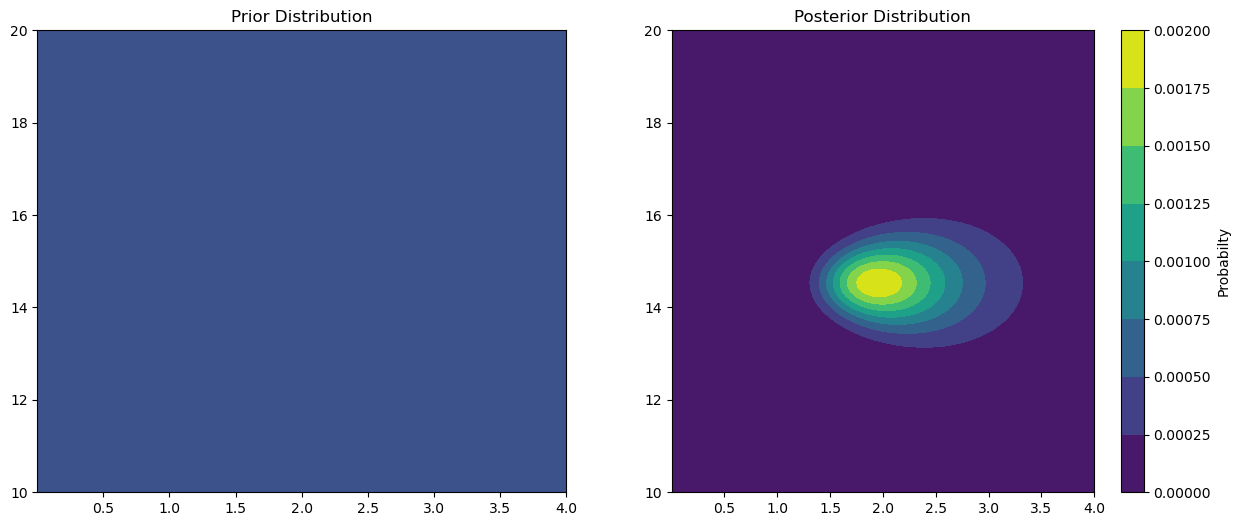

In [63]:
fig, ax = plt.subplots(1,2, figsize=(15,6))
X, Y = np.meshgrid(hypotheses_sd, hypotheses_mean)
ax[0].set_title('Prior Distribution')
ax[0].contourf(X, Y, prior);
ax[1].set_title('Posterior Distribution')
CS = ax[1].contourf(X, Y, posterior_2);
cbar = fig.colorbar(CS)
cbar.ax.set_ylabel('Probabilty')

## 3. Linear Regression

Ok, let's step it up another notch and see if we can perform linear regression using only Bayes Rule, a normal pdf, and for-loops. Again, we're going to start with simulated data so we can know how we are doing with our Bayesian inference.

Generating data using the "true" parameters

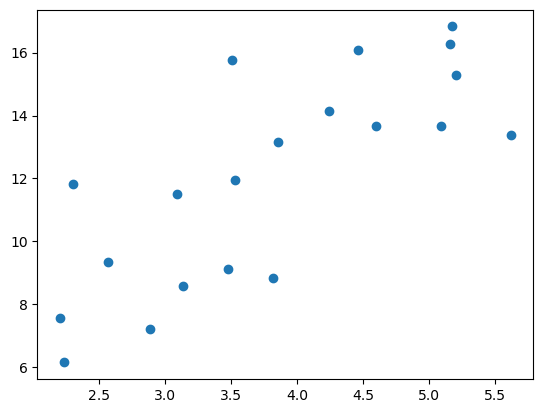

In [64]:
b0_true = 4
b1_true = 2
sigma_true = 2

num_of_obs = 20

# Seed random number generator
np.random.seed(161)

# x = np.random.normal(6, 2, num_of_obs)
x = np.random.uniform(6, 2, num_of_obs)

y = b0_true + b1_true*x + np.random.randn(len(x))*sigma_true

plt.scatter(x,y);

In [65]:
hypotheses_b0 = np.linspace(2, 6, 50) #These are all the intercepts we want to test
hypotheses_b1 = np.linspace(1, 4, 50) #These are all the slopes we want to test
hypotheses_s = np.linspace(0.001, 4, 50) #These are all the standard deviations we want to test

In [66]:
prior = np.ones([len(hypotheses_b0), len(hypotheses_b1), len(hypotheses_s)]) # Flat prior

Now to loop through all combinations of parameters and calculate our posterior distributions for each of our hypotheses.

In [68]:
unnormalized_posterior = np.zeros([len(hypotheses_b0), len(hypotheses_b1), len(hypotheses_s)])
marginal_likelihood = 0
for i in range(len(hypotheses_b0)):
    b0 = hypotheses_b0[i]
    for j in range(len(hypotheses_b1)):
        b1 = hypotheses_b1[j]
        for k in range(len(hypotheses_s)):
            s = hypotheses_s[k]
            unnormalized_likelihood = 1 
            for d in range(len(x)):
                unnormalized_likelihood *= stats.distributions.norm.pdf(y[d], loc = b0 + b1*x[d], scale = s)  # what is the likelihood of seeing this data point, given this distribution with these parameters?
            unnormalized_posterior[i, j, k] = unnormalized_likelihood*prior[i, j, k]
            marginal_likelihood += unnormalized_likelihood*prior[i, j, k]   
                
posterior_3 = unnormalized_posterior/marginal_likelihood

Let's make sure our posterior integrates to 1.

In [69]:
sum(sum(sum(posterior_3)))

1.0000000000000273

Now we find the MAP by finding the mode of the posterior distribution.

In [70]:
max_posterior_3 = np.where(posterior_3 == np.amax(posterior_3))

In [71]:
print(f'b0 with Bayes:{hypotheses_b0[max_posterior_3[0]]}') 
print(f'b1 with Bayes:{hypotheses_b1[max_posterior_3[1]]}') 
print(f'sigma with Bayes:{hypotheses_s[max_posterior_3[2]]}') 

b0 with Bayes:[3.06122449]
b1 with Bayes:[2.34693878]
sigma with Bayes:[2.04130612]


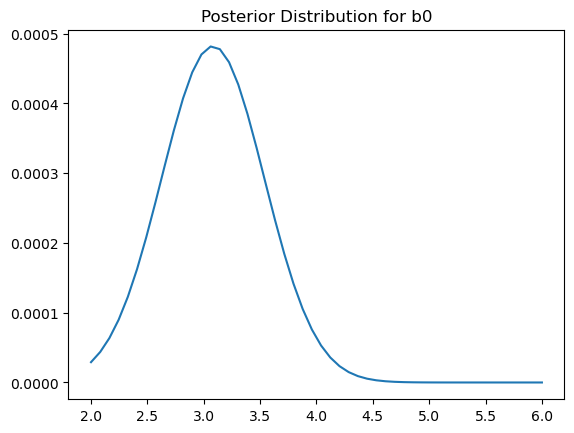

In [72]:
plt.plot(hypotheses_b0, posterior_3[:, max_posterior_3[1], max_posterior_3[2]]);
plt.title("Posterior Distribution for b0");

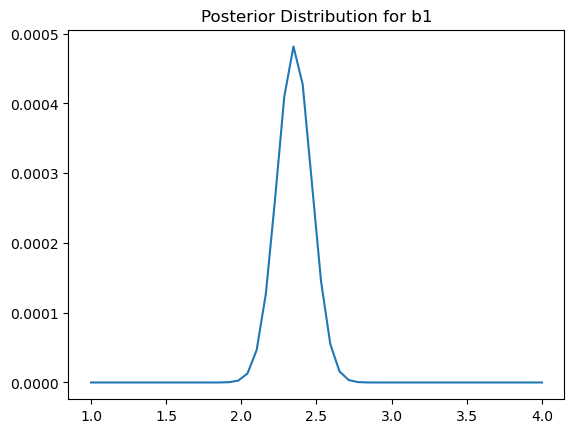

In [73]:
plt.plot(hypotheses_b1, posterior_3[max_posterior_3[0], :, max_posterior_3[2]].T);
plt.title("Posterior Distribution for b1");

Checking what sklearn returns for slope and intercept for comparison.

In [74]:
lr = lm.LinearRegression()
lr.fit(x.reshape(-1,1), y.reshape(-1,1))

LinearRegression()

In [75]:
print(f'b0    --> with Bayes:{hypotheses_b0[max_posterior_3[0]]}, with sklearn:{lr.intercept_}') 
print(f'b1    --> with Bayes:{hypotheses_b1[max_posterior_3[1]]}, with sklearn:{lr.coef_}') 
print(f'sigma --> with Bayes:{hypotheses_s[max_posterior_3[2]]}, ') 

b0    --> with Bayes:[3.06122449], with sklearn:[3.09689066]
b1    --> with Bayes:[2.34693878], with sklearn:[[2.34292203]]
sigma --> with Bayes:[2.04130612], 


And let's check out some more statistical details using statsmodels

In [76]:
x1 = sm.add_constant(x)
sm.OLS(y, x1).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     26.15
Date:                Tue, 30 May 2023   Prob (F-statistic):           7.27e-05
Time:                        17:05:21   Log-Likelihood:                -42.948
No. Observations:                  20   AIC:                             89.90
Df Residuals:                      18   BIC:                             91.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0969      1.812      1.709      0.105      -0.710       6.904
x1             2.3429      0.458      5.114      0.000       1.380       3.306
==============================================================================
Omnibus:                        0.521   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.771   Jarque-Bera (JB):                0.618
Skew:                           0.264   Prob(JB):                        0.734
Kurtosis:                       2.319   Cond. No.                         15.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Example from pymc3: 

In [252]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

# Initialize random number generator
np.random.seed(123)

# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# Simulate outcome variable
Y = alpha + beta[0]*X1 + beta[1]*X2 + np.random.randn(size)*sigma

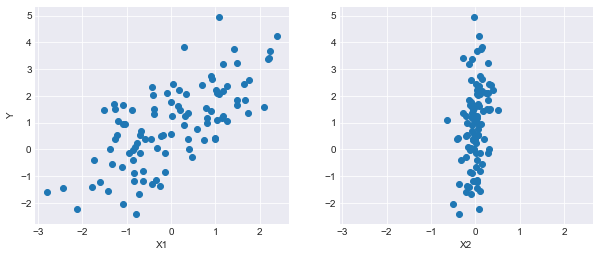

In [253]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,4))
axes[0].scatter(X1, Y)
axes[1].scatter(X2, Y)
axes[0].set_ylabel('Y'); axes[0].set_xlabel('X1'); axes[1].set_xlabel('X2');

In [33]:
Y

array([ 9.38706859e-01,  4.10296149e-01,  3.83981292e+00,  1.48115418e+00,
        4.02779506e-01,  2.46184530e+00, -1.42342679e+00, -1.27520755e+00,
        2.38380704e+00, -3.90761758e-01,  6.86815665e-01,  2.10641559e+00,
        1.84890360e+00, -8.04359754e-01,  3.93284941e-01,  2.31721220e+00,
        3.41651416e+00,  3.39016804e+00,  2.22246532e+00,  3.77308673e-01,
        3.43806883e-01,  1.66274112e+00, -1.20663529e-01,  2.18829692e+00,
        1.50706675e+00, -1.19159361e+00,  1.44784359e+00, -1.55349860e+00,
       -1.40248284e-01, -1.96609652e-02, -1.35472064e+00, -1.59474188e+00,
       -1.39656749e+00,  5.29754386e-01,  2.63051387e+00,  5.53932221e-01,
        1.76084808e+00,  2.39686504e+00,  1.47396672e+00,  9.07514885e-01,
        7.37921664e-02, -3.82899347e-01,  1.49271947e+00,  7.65880501e-01,
        2.05273917e+00,  5.63172455e-01,  4.25098874e+00,  3.26909416e-02,
        3.93785393e-01,  3.67324277e+00,  1.69575050e+00,  9.38133214e-01,
        1.35531685e+00, -